In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis, skew

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Analysis_Projects/my_data_analysis_project/data/raw/cleaned_laptop_data_no_processor.csv")

In [ ]:
df.head()

,Brand,Spec_Score,Model_Name,Series,Price,Price_Range,Utility,Processor_Brand,Core Configuration,Clock-speed,OS Type,RAM Type,Ram_Capacity(GB),Graphics_Brand,Display Size (Inches),Resolution Width,Resolution Height,PPI,Aspect Ratio,Weight(kg),Touchscreen,Screen_Protection,Colour(s),Outlier_Flag,Original_Brand
0,Acer,7.2,one 14 z8415,one,34990.0,Economy,Everyday Use,Intel,Quad Core,2.5,Windows,DDR4,16,Intel,14.0,1920,1080,157.35,1.78,1.49,No,Yes,Silver,0,Acer
1,HP,4.2,15fc0026au,15fc0026au,36990.0,Economy,Everyday Use,AMD,Quad Core,2.4,Windows,LPDDR5,8,AMD,15.6,1920,1080,141.21,1.78,1.75,No,Yes,Silver,0,HP
2,HP,5.1,15sfq5007tu,15sfq5007tu,37166.0,Economy,Everyday Use,Intel,Hexa Core,4.2,Windows,DDR4,8,Intel,15.6,1920,1080,141.21,1.78,1.69,No,Yes,Silver,0,HP
3,Acer,8.0,predator helios neo 16 phn1671,predator,112980.0,Premium,Everyday Use,Intel,Octa Core,2.1,Windows,DDR5,16,NVIDIA,16.0,1920,1200,141.51,1.60,2.60,No,No,Black,0,Acer
4,Asus,5.4,tuf gaming f17 fx706hf,tuf,57990.0,Economy,Everyday Use,Intel,Hexa Core,2.7,Windows,DDR4,8,NVIDIA,17.3,1920,1080,127.34,1.78,2.60,No,Yes,Black,0,Asus


In [ ]:
# Summary statistics
summary_stats = df.describe(include='all')

# Check for null values
null_values = df.isnull().sum()

summary_stats, null_values


(       Brand   Spec_Score        Model_Name    Series          Price  \
 count   2669  2669.000000              2669      2669    2669.000000   
 unique    11          NaN              1524       270            NaN   
 top     Asus          NaN  inspiron 15 3511  vivobook            NaN   
 freq     685          NaN                36       373            NaN   
 mean     NaN     6.486474               NaN       NaN   82521.865118   
 std      NaN     2.255362               NaN       NaN   59564.044352   
 min      NaN     1.200000               NaN       NaN   13990.000000   
 25%      NaN     5.000000               NaN       NaN   44990.000000   
 50%      NaN     6.400000               NaN       NaN   64990.000000   
 75%      NaN     8.200000               NaN       NaN   96900.000000   
 max      NaN    18.800000               NaN       NaN  489883.000000   
 
        Price_Range       Utility Processor_Brand Core Configuration  \
 count         2669          2669            2669 

To perform a bivariate analysis of the Price and Brand columns, we'll follow these steps:


Visual Exploration: Create a box plot to visualize the distribution of prices for each brand.

Correlation Analysis: Since Brand is a categorical variable, we can't directly compute a correlation. Instead, we'll examine if there's a significant relationship or pattern between Brand and Price.

Visual Exploration

We'll create a box plot to show the distribution of laptop prices for each brand. This will help us understand how prices vary across different brands.


<Figure size 1200x800 with 0 Axes>

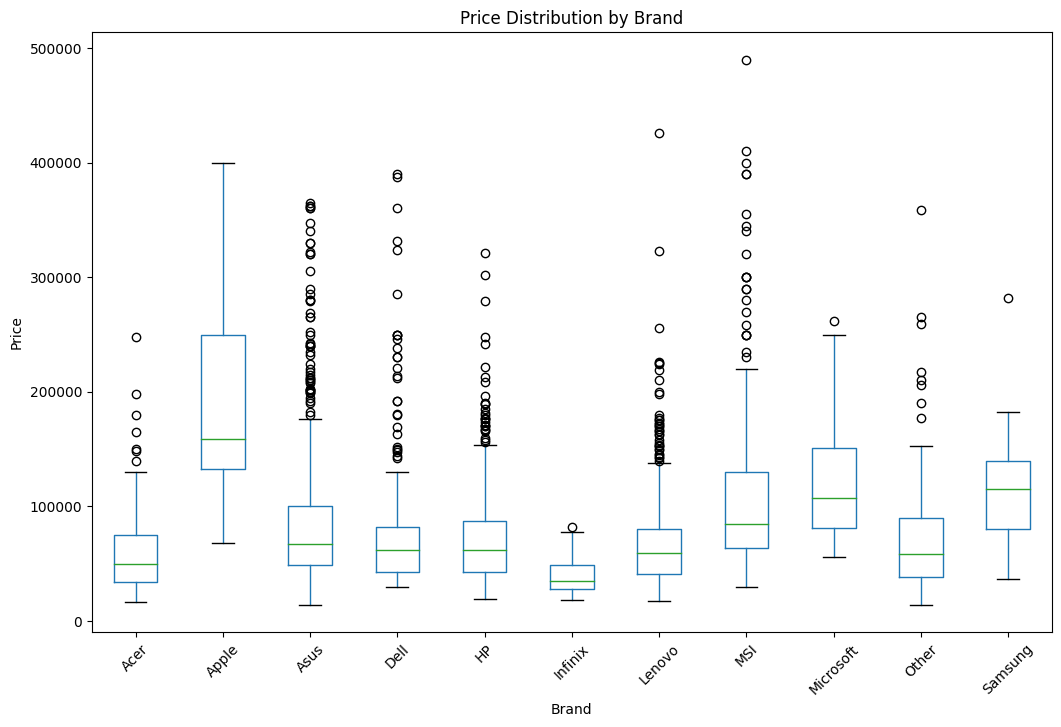

In [ ]:
# Box plot for Price distribution by Brand
plt.figure(figsize=(12, 8))
df.boxplot(column='Price', by='Brand', grid=False, rot=45, figsize=(12, 8))
plt.title('Price Distribution by Brand')
plt.suptitle('')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


Correlation Analysis

Next, let's calculate the average price for each brand and perform a one-way ANOVA to examine if there are statistically significant differences in prices across different brands.

We'll start by calculating the average price for each brand and then perform the ANOVA.

In [ ]:
# Calculate average price for each brand
average_price_by_brand = df.groupby('Brand')['Price'].mean()

# Perform one-way ANOVA
from scipy.stats import f_oneway

# Prepare data for ANOVA
price_by_brand = [df[df['Brand'] == brand]['Price'] for brand in df['Brand'].unique()]

# Perform the ANOVA
anova_result = f_oneway(*price_by_brand)

average_price_by_brand, anova_result


(Brand
 Acer          61736.213115
 Apple        193183.403226
 Asus          86423.297810
 Dell          77665.767123
 HP            73028.200787
 Infinix       39799.948718
 Lenovo        68158.894265
 MSI          111975.495652
 Microsoft    124773.666667
 Other         76338.322917
 Samsung      115145.433962
 Name: Price, dtype: float64,
 F_onewayResult(statistic=44.74233878441806, pvalue=9.21155587346948e-83))

There is a significant relationship between the Brand and the Price of laptops. This suggests that the brand of a laptop is a strong indicator of its price, with some brands being generally more expensive than others.

Let's focus on the top 5 brands by the number of entries in the dataset and visualize their prices.

We can create a bar plot to show the average price of these top 5 brands.

In [ ]:
# Identify the top 5 brands by the number of entries
top_5_brands = df['Brand'].value_counts().head(5).index

# Filter the dataset to include only the top 5 brands
top_5_df = df[df['Brand'].isin(top_5_brands)]

# Calculate average price for each of the top 5 brands
average_price_top_5 = top_5_df.groupby('Brand')['Price'].mean().round(2).reset_index()

# Create a bar chart using Plotly
fig = px.bar(average_price_top_5, x='Brand', y='Price',
             title='Average Price of Top 5 Laptop Brands by Number of Entries',
             labels={'Brand': 'Brand', 'Price': 'Average Price'},
             text='Price')

# Show the plot
fig.show()



MSI has the highest average price among the top 5 brands.

Lenova has the lowest average price among these brands.


Based on the actual top 5 brands by their average price.

We'll update the analysis to  reflect the top 5 brands by average price.

In [ ]:
# Calculate average price for each brand and sort, then get top 5 brands
top_5_brands_by_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(5).round(2).reset_index()

# Create a bar chart using Plotly
fig = px.bar(top_5_brands_by_price, x='Brand', y='Price',
             title='Average Price of Top 5 Laptop Brands by Price',
             labels={'Brand': 'Brand', 'Price': 'Average Price'},
             text='Price')

# Show the plot
fig.show()



create an interactive bar chart displaying the average prices of the top 5 laptop brands based on the highest average prices in the dataset

Explore the relationship between Brand and Price_Range, we'll visualize how different brands fall into various price ranges.

This can help us understand the distribution of price ranges across different brands. We can use a stacked bar chart for this purpose.

In [ ]:
# Prepare the data
brand_price_range_counts = df.groupby(['Brand', 'Price_Range']).size().reset_index(name='Count')

# Create a stacked bar chart using Plotly
fig = px.bar(brand_price_range_counts, x='Brand', y='Count', color='Price_Range',
             title='Distribution of Price Range across Different Brands',
             labels={'Brand': 'Brand', 'Count': 'Number of Laptops', 'Price_Range': 'Price Range'})

# Show the plot
fig.show()


In [ ]:
# Calculate start and end prices for each price range category
price_ranges = df.groupby('Price_Range')['Price'].agg(['min', 'max'])

# Create a table for start and end prices of each price range category
table_data = go.Table(
    header=dict(
        values=['<b>Price Range</b>', '<b>Start Price (₹)</b>', '<b>End Price (₹)</b>'],
        fill_color='paleturquoise',
        align='left',
        font=dict(size=14)
    ),
    cells=dict(
        values=[
            price_ranges.index,
            price_ranges['min'].apply(lambda x: f"{x:,.0f}"),
            price_ranges['max'].apply(lambda x: f"{x:,.0f}")
        ],
        fill_color='lavender',
        align='left',
        font=dict(size=12)
    )
)

# Create the figure
fig_table = go.Figure(data=[table_data])

# Update the layout for better presentation
fig_table.update_layout(
    title='Start and End Prices for Each Price Category',
    title_x=0.5,
    template='plotly_white'
)

# Show the table
fig_table.show()

Asus and HP seem to have a significant presence in multiple price ranges.

Dell and Lenovo have a balanced distribution across different price ranges.


In [ ]:
import plotly.express as px

# Identify the top 5 brands by the number of entries
top_5_brands = df['Brand'].value_counts().head(5).index

# Filter the dataset to include only the top 5 brands
top_5_df = df[df['Brand'].isin(top_5_brands)]

# Prepare the data for the top 5 brands
brand_price_range_counts = top_5_df.groupby(['Brand', 'Price_Range']).size().reset_index(name='Count')

# Create a stacked bar chart using Plotly
fig = px.bar(brand_price_range_counts, x='Brand', y='Count', color='Price_Range',
             title='Price Range Distribution for Top 5 Laptop Brands',
             labels={'Brand': 'Brand', 'Count': 'Number of Laptops', 'Price_Range': 'Price Range'},
             barmode='stack')

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the specified brands
selected_brands = ['Apple', 'Samsung', 'Infinix', 'Microsoft']
selected_brands_df = df[df['Brand'].isin(selected_brands)]

# Prepare the data for the selected brands
brand_price_range_counts = selected_brands_df.groupby(['Brand', 'Price_Range']).size().reset_index(name='Count')

# Create a stacked bar chart using Plotly
fig = px.bar(brand_price_range_counts, x='Brand', y='Count', color='Price_Range',
             title='Price Range Distribution for Selected Laptop Brands (Apple, Samsung, Infinix, Microsoft)',
             labels={'Brand': 'Brand', 'Count': 'Number of Laptops', 'Price_Range': 'Price Range'},
             barmode='stack')

# Show the plot
fig.show()


Apple: Primarily positioned in the higher price ranges, with a significant presence in the premium segments.

Samsung: Also has a strong presence in the higher price ranges, though not as dominant as Apple.

Infinix: Positioned in the lower price ranges, indicating a focus on more budget-friendly laptops.

Microsoft: Similar to Apple, with a strong presence in the premium price ranges.

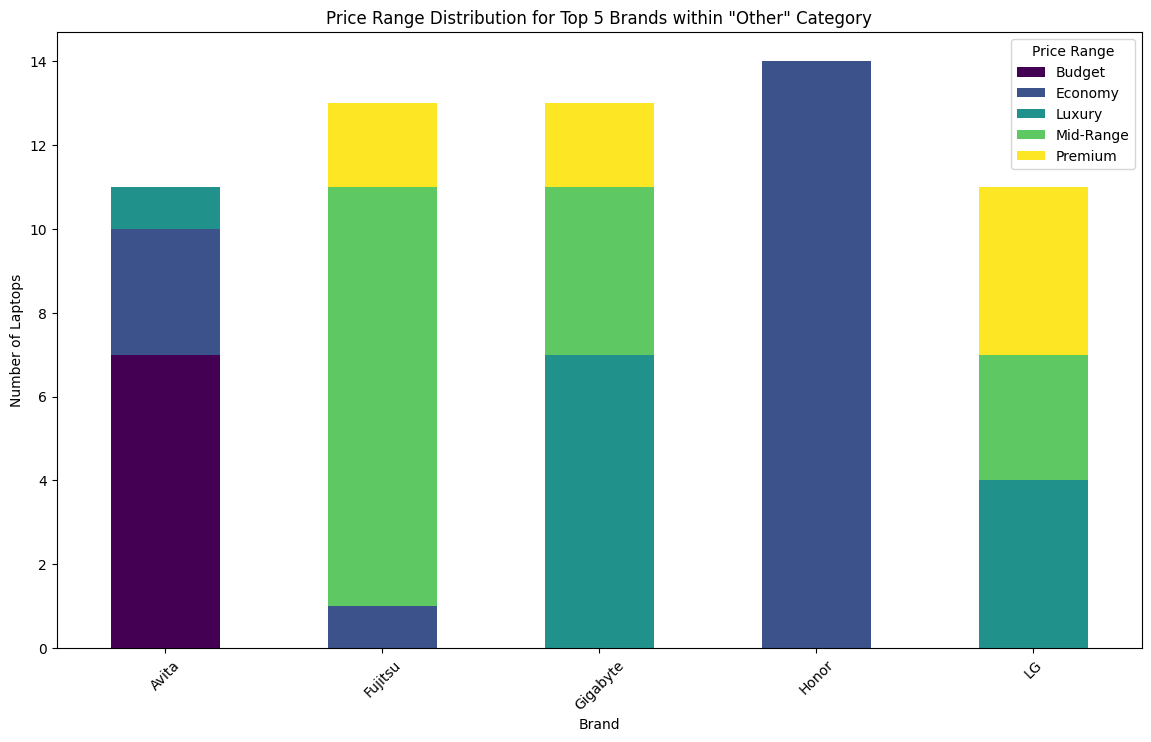

In [ ]:
# Filter the dataset to include only the "Other" brand
other_df = df[df['Brand'] == 'Other']

# Identify the top 5 brands within the "Other" category by the number of entries
top_5_other_brands = other_df['Original_Brand'].value_counts().head(5).index

# Filter the dataset to include only the top 5 brands within "Other"
top_5_other_df = other_df[other_df['Original_Brand'].isin(top_5_other_brands)]

# Prepare the data for the top 5 brands within "Other"
other_brand_price_range_counts = top_5_other_df.groupby(['Original_Brand', 'Price_Range']).size().unstack(fill_value=0)

# Create a stacked bar chart using Matplotlib
other_brand_price_range_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Price Range Distribution for Top 5 Brands within "Other" Category')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.show()


To analyze the price range distribution specifically for the Asus brand, we'll create a stacked bar chart to show the distribution of price ranges for Asus laptops.

In [ ]:
# Filter the dataset to include only the Asus brand
asus_df = df[df['Brand'] == 'Asus']

# Prepare the data for the Asus brand
asus_price_range_counts = asus_df.groupby(['Price_Range']).size().reset_index(name='Count')

# Create a bar chart using Plotly
fig = px.bar(asus_price_range_counts, x='Price_Range', y='Count',
             title='Price Range Distribution for Asus Laptops',
             labels={'Price_Range': 'Price Range', 'Count': 'Number of Laptops'},
             text='Count')

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the Lenovo brand
lenovo_df = df[df['Brand'] == 'Lenovo']

# Prepare the data for the Lenovo brand
lenovo_price_range_counts = lenovo_df.groupby(['Price_Range']).size().reset_index(name='Count')

# Create a bar chart using Plotly
fig = px.bar(lenovo_price_range_counts, x='Price_Range', y='Count',
             title='Price Range Distribution for Lenovo Laptops',
             labels={'Price_Range': 'Price Range', 'Count': 'Number of Laptops'},
             text='Count')

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the Asus and Lenovo brands
asus_df = df[df['Brand'] == 'Asus']
lenovo_df = df[df['Brand'] == 'Lenovo']

# Prepare the data for the Asus and Lenovo brands
asus_price_range_counts = asus_df['Price_Range'].value_counts().reset_index()
asus_price_range_counts.columns = ['Price_Range', 'Count']

lenovo_price_range_counts = lenovo_df['Price_Range'].value_counts().reset_index()
lenovo_price_range_counts.columns = ['Price_Range', 'Count']

# Create pie charts using Plotly
fig = go.Figure()

# Asus pie chart
fig.add_trace(go.Pie(
    labels=asus_price_range_counts['Price_Range'],
    values=asus_price_range_counts['Count'],
    name="Asus",
    domain={'x': [0, 0.5]},
    hole=.3,
    title='Asus Price Range Distribution'
))

# Lenovo pie chart
fig.add_trace(go.Pie(
    labels=lenovo_price_range_counts['Price_Range'],
    values=lenovo_price_range_counts['Count'],
    name="Lenovo",
    domain={'x': [0.5, 1]},
    hole=.3,
    title='Lenovo Price Range Distribution'
))

# Update layout for side-by-side pie charts
fig.update_layout(
    title_text='Market Share of Asus and Lenovo Laptops by Price Range',
    annotations=[dict(text='Asus', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Lenovo', x=0.80, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the HP and Dell brands
hp_df = df[df['Brand'] == 'HP']
dell_df = df[df['Brand'] == 'Dell']

# Prepare the data for the HP and Dell brands
hp_price_range_counts = hp_df['Price_Range'].value_counts().reset_index()
hp_price_range_counts.columns = ['Price_Range', 'Count']

dell_price_range_counts = dell_df['Price_Range'].value_counts().reset_index()
dell_price_range_counts.columns = ['Price_Range', 'Count']

# Create pie charts using Plotly
fig = go.Figure()

# HP pie chart
fig.add_trace(go.Pie(
    labels=hp_price_range_counts['Price_Range'],
    values=hp_price_range_counts['Count'],
    name="HP",
    domain={'x': [0, 0.5]},
    hole=.3,
    title='HP Price Range Distribution'
))

# Dell pie chart
fig.add_trace(go.Pie(
    labels=dell_price_range_counts['Price_Range'],
    values=dell_price_range_counts['Count'],
    name="Dell",
    domain={'x': [0.5, 1]},
    hole=.3,
    title='Dell Price Range Distribution'
))

# Update layout for side-by-side pie charts
fig.update_layout(
    title_text='Market Share of HP and Dell Laptops by Price Range',
    annotations=[dict(text='HP', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Dell', x=0.80, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the specified brands
asus_df = df[df['Brand'] == 'Asus']
lenovo_df = df[df['Brand'] == 'Lenovo']
hp_df = df[df['Brand'] == 'HP']
dell_df = df[df['Brand'] == 'Dell']

# Prepare the data for each brand
asus_price_range_counts = asus_df['Price_Range'].value_counts().reset_index()
asus_price_range_counts.columns = ['Price_Range', 'Count']

lenovo_price_range_counts = lenovo_df['Price_Range'].value_counts().reset_index()
lenovo_price_range_counts.columns = ['Price_Range', 'Count']

hp_price_range_counts = hp_df['Price_Range'].value_counts().reset_index()
hp_price_range_counts.columns = ['Price_Range', 'Count']

dell_price_range_counts = dell_df['Price_Range'].value_counts().reset_index()
dell_price_range_counts.columns = ['Price_Range', 'Count']

# Create pie charts using Plotly
fig = go.Figure()

# Asus pie chart
fig.add_trace(go.Pie(
    labels=asus_price_range_counts['Price_Range'],
    values=asus_price_range_counts['Count'],
    name="Asus",
    domain={'x': [0, 0.25]},
    hole=.3,
    title='Asus Price Range Distribution'
))

# Lenovo pie chart
fig.add_trace(go.Pie(
    labels=lenovo_price_range_counts['Price_Range'],
    values=lenovo_price_range_counts['Count'],
    name="Lenovo",
    domain={'x': [0.25, 0.5]},
    hole=.3,
    title='Lenovo Price Range Distribution'
))

# HP pie chart
fig.add_trace(go.Pie(
    labels=hp_price_range_counts['Price_Range'],
    values=hp_price_range_counts['Count'],
    name="HP",
    domain={'x': [0.5, 0.75]},
    hole=.3,
    title='HP Price Range Distribution'
))

# Dell pie chart
fig.add_trace(go.Pie(
    labels=dell_price_range_counts['Price_Range'],
    values=dell_price_range_counts['Count'],
    name="Dell",
    domain={'x': [0.75, 1]},
    hole=.3,
    title='Dell Price Range Distribution'
))

# Update layout for side-by-side pie charts
fig.update_layout(
    title_text='Market Share of Asus, Lenovo, HP, and Dell Laptops by Price Range',
    annotations=[dict(text='Asus', x=0.125, y=0.5, font_size=20, showarrow=False),
                 dict(text='Lenovo', x=0.375, y=0.5, font_size=20, showarrow=False),
                 dict(text='HP', x=0.625, y=0.5, font_size=20, showarrow=False),
                 dict(text='Dell', x=0.875, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


In [ ]:
# Filter the dataset to include only the specified brands
apple_df = df[df['Brand'] == 'Apple']
samsung_df = df[df['Brand'] == 'Samsung']
infinix_df = df[df['Brand'] == 'Infinix']
microsoft_df = df[df['Brand'] == 'Microsoft']

# Prepare the data for each brand
apple_price_range_counts = apple_df['Price_Range'].value_counts().reset_index()
apple_price_range_counts.columns = ['Price_Range', 'Count']

samsung_price_range_counts = samsung_df['Price_Range'].value_counts().reset_index()
samsung_price_range_counts.columns = ['Price_Range', 'Count']

infinix_price_range_counts = infinix_df['Price_Range'].value_counts().reset_index()
infinix_price_range_counts.columns = ['Price_Range', 'Count']

microsoft_price_range_counts = microsoft_df['Price_Range'].value_counts().reset_index()
microsoft_price_range_counts.columns = ['Price_Range', 'Count']

# Create pie charts using Plotly
fig = go.Figure()

# Apple pie chart
fig.add_trace(go.Pie(
    labels=apple_price_range_counts['Price_Range'],
    values=apple_price_range_counts['Count'],
    name="Apple",
    domain={'x': [0, 0.25]},
    hole=.3,
    title='Apple Price Range Distribution'
))

# Samsung pie chart
fig.add_trace(go.Pie(
    labels=samsung_price_range_counts['Price_Range'],
    values=samsung_price_range_counts['Count'],
    name="Samsung",
    domain={'x': [0.25, 0.5]},
    hole=.3,
    title='Samsung Price Range Distribution'
))

# Infinix pie chart
fig.add_trace(go.Pie(
    labels=infinix_price_range_counts['Price_Range'],
    values=infinix_price_range_counts['Count'],
    name="Infinix",
    domain={'x': [0.5, 0.75]},
    hole=.3,
    title='Infinix Price Range Distribution'
))

# Microsoft pie chart
fig.add_trace(go.Pie(
    labels=microsoft_price_range_counts['Price_Range'],
    values=microsoft_price_range_counts['Count'],
    name="Microsoft",
    domain={'x': [0.75, 1]},
    hole=.3,
    title='Microsoft Price Range Distribution'
))

# Update layout for side-by-side pie charts
fig.update_layout(
    title_text='Market Share of Apple, Samsung, Infinix, and Microsoft Laptops by Price Range',
    annotations=[dict(text='Apple', x=0.125, y=0.5, font_size=20, showarrow=False),
                 dict(text='Samsung', x=0.375, y=0.5, font_size=20, showarrow=False),
                 dict(text='Infinix', x=0.625, y=0.5, font_size=20, showarrow=False),
                 dict(text='Microsoft', x=0.875, y=0.5, font_size=20, showarrow=False)]
)

# Show the plot
fig.show()


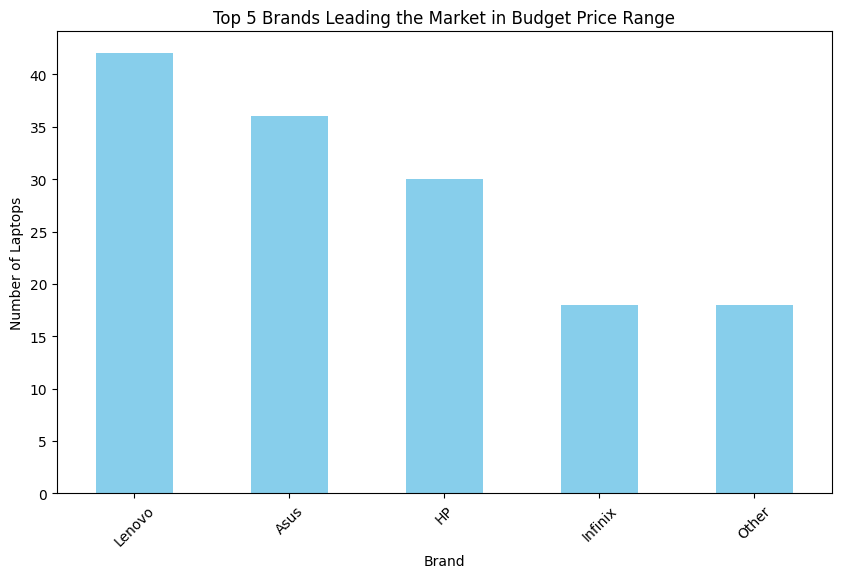

In [ ]:
# Define the budget price range, assuming it is labeled as "Economy"
budget_price_range = "Budget"

# Filter the dataset to include only laptops in the budget price range
budget_df = df[df['Price_Range'] == budget_price_range]
# Count the number of laptops in the budget price range for each brand
budget_brand_counts = budget_df['Brand'].value_counts()

# Get the top 5 brands in the budget price range
top_5_budget_brands = budget_brand_counts.head(5)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
top_5_budget_brands.plot(kind='bar', color='skyblue')

plt.title('Top 5 Brands Leading the Market in Budget Price Range')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


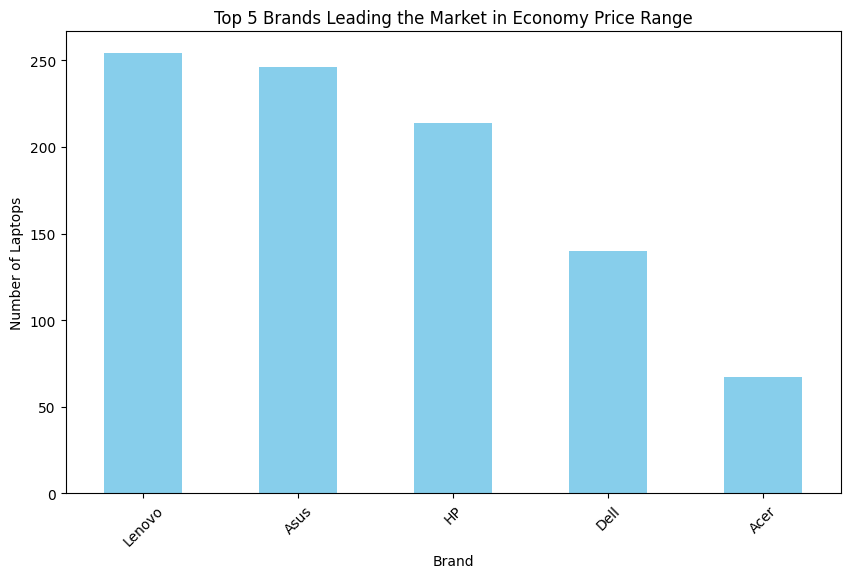

In [ ]:
# Define the budget price range, assuming it is labeled as "Economy"
budget_price_range = "Economy"

# Filter the dataset to include only laptops in the budget price range
budget_df = df[df['Price_Range'] == budget_price_range]
# Count the number of laptops in the budget price range for each brand
budget_brand_counts = budget_df['Brand'].value_counts()

# Get the top 5 brands in the economy price range
top_5_economy_brands = budget_brand_counts.head(5)

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
top_5_economy_brands.plot(kind='bar', color='skyblue')

plt.title('Top 5 Brands Leading the Market in Economy Price Range')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.columns

Index(['Brand', 'Spec_Score', 'Model_Name', 'Series', 'Price', 'Price_Range',
       'Utility', 'Processor_Brand', 'Core Configuration', 'Clock-speed',
       'OS Type', 'RAM Type', 'Ram_Capacity(GB)', 'Graphics_Brand',
       'Display Size (Inches)', 'Resolution Width', 'Resolution Height', 'PPI',
       'Aspect Ratio', 'Weight(kg)', 'Touchscreen', 'Screen_Protection',
       'Colour(s)', 'Outlier_Flag', 'Original_Brand'],
      dtype='object')

To explore the relationship between Price and Utility, we will create a box plot to visualize the distribution of prices across different utility categories.

We can also calculate the correlation between Price and Utility to understand their relationship statistically.

<Figure size 1400x800 with 0 Axes>

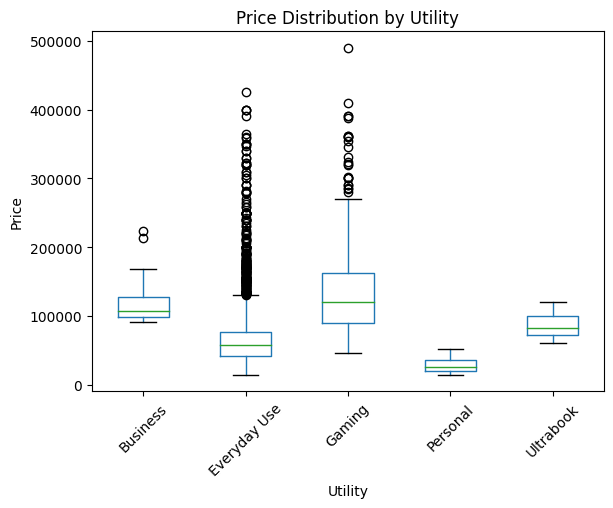

In [ ]:
# Create a box plot to visualize the distribution of prices across different utility categories
plt.figure(figsize=(14, 8))
df.boxplot(column='Price', by='Utility', grid=False, rot=45)
plt.title('Price Distribution by Utility')
plt.suptitle('')
plt.xlabel('Utility')
plt.ylabel('Price')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the Utility column
label_encoder = LabelEncoder()
df['Utility_encoded'] = label_encoder.fit_transform(df['Utility'])

# Calculate the correlation between Price and encoded Utility
correlation = df[['Price', 'Utility_encoded']].corr().iloc[0, 1]

correlation


0.10117510512265045

The correlation coefficient between Price and Utility is approximately 0.101.

This indicates a weak positive correlation between the two variables. In other words, there is a slight tendency for higher prices to be associated with certain utility categories, but the relationship is not strong.

The box plot shows how prices are distributed across different utility categories, providing a visual exploration of the relationship.

The correlation analysis indicates a weak positive correlation between Price and Utility.

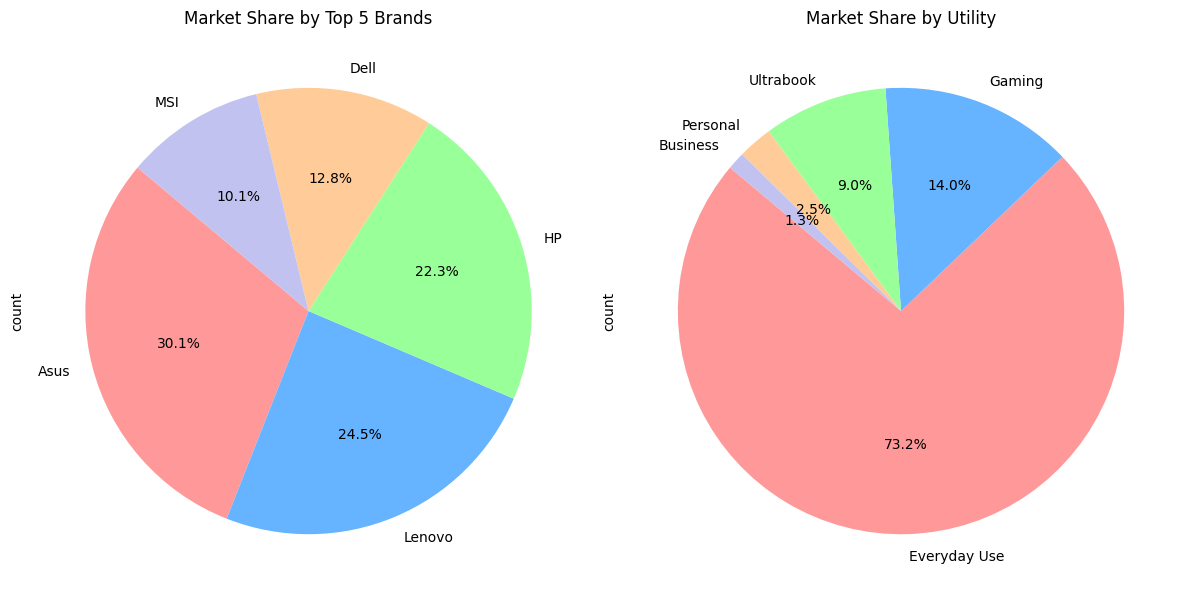

In [ ]:
# Calculate the market share for the top 5 brands
top_brands = df['Brand'].value_counts().nlargest(5)
top_brands_percentage = (top_brands / top_brands.sum()) * 100

# Calculate the market share for the utility
utility_share = df['Utility'].value_counts()
utility_share_percentage = (utility_share / utility_share.sum()) * 100

# Plotting the market share for top 5 brands
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_brands_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Market Share by Top 5 Brands')

# Plotting the market share for utility
plt.subplot(1, 2, 2)
utility_share_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Market Share by Utility')

plt.tight_layout()
plt.show()


Here is the combined visual of the top 5 brands and their respective utilities.

 This bar plot shows the distribution of different utility categories within each of the top 5 brands.

In [ ]:
top_brands = df['Brand'].value_counts().nlargest(5).index
top_brands_data = df[df['Brand'].isin(top_brands)]

# Creating the plot
fig = px.histogram(top_brands_data,
                   y='Brand',
                   color='Utility',
                   category_orders={'Brand': top_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 Brands and Utility',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Utility',
    template='plotly_white'
)

# Showing the plot
fig.show()


In [ ]:
# Filter data for the specified brands
selected_brands = ['Acer', 'Apple', 'Samsung', 'Infinix', 'Microsoft']
selected_brands_data = df[df['Brand'].isin(selected_brands)]

# Plotting combined visual of selected brands and utility
import plotly.express as px

fig = px.histogram(selected_brands_data,
                   y='Brand',
                   color='Utility',
                   category_orders={'Brand': selected_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Selected Brands and Utility',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Utility',
    template='plotly_white'
)

# Show the plot
fig.show()


 The combined visual for the top 5 brands within the "Other" category and their respective utilities

In [ ]:
# Filter data for 'Other' brands
other_brands_data = df[df['Brand'] == 'Other']

# Get the top 5 brands in the 'Other' category based on 'Original_Brand'
top_5_other_brands = other_brands_data['Original_Brand'].value_counts().nlargest(5).index
top_5_other_brands_data = other_brands_data[other_brands_data['Original_Brand'].isin(top_5_other_brands)]

# Plotting combined visual of top 5 'Other' brands and utility
fig = px.histogram(top_5_other_brands_data,
                   y='Original_Brand',
                   color='Utility',
                   category_orders={'Original_Brand': top_5_other_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 "Other" Brands and Utility',
    xaxis_title='Count',
    yaxis_title='Original Brand',
    barmode='stack',
    legend_title='Utility',
    template='plotly_white'
)

# Show the plot
fig.show()


In [ ]:
# Assuming df is your dataframe
top_5_brands = df['Brand'].value_counts().nlargest(5).index
top_5_brands_data = df[df['Brand'].isin(top_5_brands)]

# Creating the plot
fig = px.histogram(top_5_brands_data,
                   y='Brand',
                   color='Utility',
                   facet_col='Price_Range',
                   category_orders={'Brand': top_5_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 Brands, Price Range, and Utility',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Utility',
    template='plotly_white'
)

# Showing the plot
fig.show()


Combined visual exploration of the top 5 brands with their processor brand and utility to see the market distribution

In [ ]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
top_5_brands_data = df[df['Brand'].isin(top_5_brands)]

# Creating the plot
fig = px.histogram(top_5_brands_data,
                   y='Brand',
                   color='Utility',
                   facet_col='Processor_Brand',
                   category_orders={'Brand': top_5_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 Brands, Processor Brand, and Utility',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Utility',
    template='plotly_white'
)

# Showing the plot
fig.show()


In [ ]:
top_5_brands = df['Brand'].value_counts().nlargest(5).index
top_5_brands_data = df[df['Brand'].isin(top_5_brands)]

# Creating the plot
fig = px.histogram(top_5_brands_data,
                   y='Brand',
                   color='Touchscreen',
                   facet_col='Price_Range',
                   category_orders={'Brand': top_5_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 Brands, Touchscreen, and Price Range',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Touchscreen',
    template='plotly_white'
)

# Showing the plot
fig.show()


In [ ]:
# df is your dataframe
selected_brands = ['Acer', 'Apple', 'Samsung', 'Infinix', 'Microsoft']
selected_brands_data = df[df['Brand'].isin(selected_brands)]

# Creating the plot
fig = px.histogram(selected_brands_data,
                   y='Brand',
                   color='Touchscreen',
                   facet_col='Price_Range',
                   category_orders={'Brand': selected_brands},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Selected Brands, Touchscreen, and Price Range',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='Touchscreen',
    template='plotly_white'
)

# Showing the plot
fig.show()


In [ ]:
# df is your dataframe
top_5_ppi = df['PPI'].value_counts().nlargest(5).index
top_5_ppi_data = df[df['PPI'].isin(top_5_ppi)]

# Creating the plot
fig = px.histogram(top_5_ppi_data,
                   y='PPI',
                   color='Brand',
                   category_orders={'PPI': top_5_ppi},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 PPI Values and Brands',
    xaxis_title='Count',
    yaxis_title='PPI',
    barmode='stack',
    legend_title='Brand',
    template='plotly_white'
)

# Showing the plot
fig.show()


Combined visual exploration of the top 5 brands, top 5 PPI values, and their respective price ranges

In [ ]:
# Assuming df is your dataframe
top_5_brands = df['Brand'].value_counts().nlargest(5).index
top_5_ppi = df['PPI'].value_counts().nlargest(5).index
top_5_brands_ppi_data = df[(df['Brand'].isin(top_5_brands)) & (df['PPI'].isin(top_5_ppi))]

# Creating the plot
fig = px.histogram(top_5_brands_ppi_data,
                   y='Brand',
                   color='PPI',
                   facet_col='Price_Range',
                   category_orders={'Brand': top_5_brands, 'PPI': top_5_ppi},
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Updating layout for better visualization
fig.update_layout(
    title='Market Share by Top 5 Brands, Top 5 PPI Values, and Price Range',
    xaxis_title='Count',
    yaxis_title='Brand',
    barmode='stack',
    legend_title='PPI',
    template='plotly_white'
)

# Showing the plot
fig.show()


In [ ]:
df.columns

Index(['Brand', 'Spec_Score', 'Model_Name', 'Series', 'Price', 'Price_Range',
       'Utility', 'Processor_Brand', 'Core Configuration', 'Clock-speed',
       'OS Type', 'RAM Type', 'Ram_Capacity(GB)', 'Graphics_Brand',
       'Display Size (Inches)', 'Resolution Width', 'Resolution Height', 'PPI',
       'Aspect Ratio', 'Weight(kg)', 'Touchscreen', 'Screen_Protection',
       'Colour(s)', 'Outlier_Flag', 'Original_Brand', 'Utility_encoded'],
      dtype='object')